<div style="padding: 20px; text-align: center; color: white;">
    <div>
        <h1 style="margin: 10px 0;"><strong>Introduction to MCP</strong></h1>
        <h2>Matthew Sayer, AI Engineer</h2>
    </div>
</div>


---
## <span style="color: #ffffff;"><strong>Part 1:</strong></span> What is MCP (Model Context Protocol)?

### **MCP**: An introduction

<strong>MCP - Model Context Protocol</strong>

The Model Context Protocol is a set of rules which allow for and govern communication between language models and tools.

One of the biggest gaps in enterprise AI usage is having the ability to give your language models the power to interact with your systems. MCP enables this.

Its architecture relies on an MCP Client, like a front-end that you connect from, and an MCP server which contains all of your tools.
<div style="background-color: #353535ff; border-left: 6px solid #000000ff; padding: 10px; margin: 10px 0;">
<strong>Hint: </strong>Think of MCP servers as toolboxes for agents. You can connect your front-end to multiple "toolboxes" at once, combining the power of multiple toolsets.
</div>

### How does it work?
1. Your MCP server contains your tool logic and exposes an endpoint for your MCP client to connect to.
2. Upon establishing a connection, the client requests a list of tools from the server. This gives your language model a full view of what tools the server has to offer.
3. The tools are bound to your MCP client session, and your language model can trigger them at will.
4. Your language model triggers your tools, producing an output and returning this to your client.


### Why is it used?
1. You can save huge amounts of time through running automated interactions with your enterprise systems, instead of clicking through a UI.
2. Less technical users can be more productive on a system, leveraging the understanding of the language model. Inputs to complex computations can be done with LLM-generated inputs based on grounded context.
3. When done right, it provides a secure, efficient and reusable way to provide tools to AI Agents.

### Objectives of this Notebook

In this notebook, you will:

1. Learn how to set up an MCP server.
2. Build a basic tool.
3. Use an MCP tool within your MCP client.

### Let’s get started!

---
## <span style="color: #ffffff;"><strong>Part 2:</strong></span> Setup

### Creating and Activating a Virtual Environment

To ensure that all dependencies are installed in an isolated environment, it is recommended to create a virtual environment. Follow the steps below:
 
1. **Create a virtual environment**:

> ```bash
> uv sync --prerelease=allow
> ```

This command will create a directory named `.venv` in your current working directory, and it will create a uv.lock file which will track the packages you have installed.

2. **Set the notebook kernel to the virtual environment**:

To use the virtual environment as the kernel for your Jupyter notebook, follow these steps:

> ```bash
> uv run python -m ipykernel install --user --name=venv
> ```

After running the above commands, you can select the `venv` kernel in your Jupyter notebook interface.

### Installing Dependencies

The uv sync command has already handled the installation of your dependencies, and you can see them in the pyproject.toml file under the dependencies list. These include the necessary langchain components, ollama and the misc packages for this notebook.

---
## <span style="color: #ffffff;"><strong>Part 3:</strong></span> Building the MCP Server

### Set up your core MCP object
First, find the <strong>mcp</strong> folder.

Next, <strong>go to mcp_server.py.</strong>

You will see that it contains only 8 lines; this shows how simply you can get started with an MCP server.

Firstly, we import the fastmcp library - this is a Python library which extends the core Python MCP SDK to provide a quick way to create production-grade MCP servers.

```python
from fastmcp import FastMCP
```

Then, we define the instance of the FastMCP class. This contains the name of the server, and the description (instructions). Here, you can also define these within the constructor:
- version - The version of your server
- auth - The authentication provider for your server, such as Azure Entra OAuth.
- middleware - Here you can define what you want the server to run each time you do a certain action. For example, every time you load your tools into your client, save the client's session and get their roles for role-based access control. Or, when you use a tool, check the user has permission.
- lifespan - To manage asynchronous connections
- mask_error_details - manages verbosity of errors sent to clients (not the server).
- website - a link to a website to describe your mcp server further.
<br>
...And others... You can see the latest here: https://gofastmcp.com/servers/server

```python
mcp = FastMCP(
    "my_first_mcp_server",
    instructions="This is an MCP server for learning",
)
```

Next, you'll need to write in the run function. Here we put in the transport method, where streamable-http will be the most up-to-date choice. We can also set this to port 8080, or whatever port you wish. This will expose the server on http://localhost:8080 or http://localhost:<your_port_here>

<i>You can also use stdio which is pretty much subprocesses running locally instead of HTTP requests between your client and the server.

I have used STDIO in my Rust MCP server example here. Rust can be a pretty good alternative to Python due to its performance (it is a compiled rather than interpreted language) and more prescriptive memory management.</i>

https://github.com/matthew-sayer/rust_mcp_server_example


### Creating an <span style="color: #ffffff;"><strong>MCP Tool</strong></span>

Now, we can create a tool. I've put in a basic FizzBuzz tool to get you started.

The most important things to know is that we're importing the mcp server object which we instantiated in the mcp_server.py, and we are decorating the tool with:

```python
@mcp.tool()
```
That enables the server to detect it as a tool to be registered.


### Then, we create the tool logic.

Below the decorator, we write in the python function which we want to expose to the MCP server. It will provide the args and returned results to expect.

We also want to write in a docstring. This is going to tell your MCP client's LLM how to use the tool. Without this, it may struggle to use the tool accurately. You can find a lot of power in a well-written docstring; think of it like a system prompt.

You'll write a standard function definition, with the docstring below it.

<i>Note, I have also included a check to say that the function should always return a Dict.</i>

```python
from typing import Dict

def fizzbuzz(x: int) -> Dict:
    """A basic FizzBuzz example tool to illustrate MCP.
    Args: x (int) - this is the upper limit to calculate FizzBuzz up to.
    Returns: results (List) - this list will contain the appended results for FizzBuzz, Fizz and Buzz.
    """

```

### Then, we put the function logic in.

```python
    results = {}
    for i in range(1, x+1):
        if i % 15 == 0:
            results[i] = "FizzBuzz"
        elif i % 3 == 0:
            results[i] = "Fizz"
        elif i % 5 == 0:
            results[i] = "Buzz"

    return results
```

### After everything, the basic server looks like the below.

```python
from fastmcp import FastMCP
from typing import Dict

mcp = FastMCP(
    "my_first_mcp_server",
    instructions="This is an MCP server for learning",  
)

@mcp.tool()
def fizzbuzz(x: int) -> Dict:
    """A basic FizzBuzz example tool to illustrate MCP.
    Args: x (int) - this is the upper limit to calculate FizzBuzz up to.
    Returns: results (Dict) - this dictionary will contain the appended results for FizzBuzz, Fizz and Buzz.
    """
    results = {}
    for i in range(1, x+1):
        if i % 15 == 0:
            results[i] = "FizzBuzz"
        elif i % 3 == 0:
            results[i] = "Fizz"
        elif i % 5 == 0:
            results[i] = "Buzz"

    return results


mcp.run(transport="streamable-http", port=8080)
```

Congratulations! You have now built a basic MCP server, with one tool.

---
## <span style="color: #ffffff;"><strong>Part 4:</strong></span> Running and using the MCP Server

### Execute the run command in your Terminal.

First, you need to run the server. We'll use <b>uv</b> because this manages our dependencies, similar to pip except uv will auto-generate a virtual env for you, and it will ensure all dependencies are installed at runtime.

```powershell
uv run mcp/mcp_server.py
```

### Now, you should see that your server is running.
![fastmcp_start.png](assets\fastmcp_start.png)


### Test it out with an MCP client

You can use any MCP client. For ease of use, we'll use the Github copilot client.

In VSCode, open your Extensions (ctrl+shift+X) and install the Github Copilot Chat extension.

You will be able to open it with the icon next to the right of your search bar. Once you are in, open the Agent mode.

![agent_window.png](assets\agent_window.png)



### Now, we need to create the connection between your MCP client (github copilot chat) and the mcp server.

First, create a .vscode folder within your project root. 

Then, put a file called mcp.json in there.

Copy the below JSON into there. There should be a little Start arrow that appears above the server name. When you click on that, it will establish the connection.

```json
{
    "servers": {
        "my_first_mcp_server": {
            "url": "http://localhost:8080/mcp"
        }
    }
}
```

#### The start button should look like this. Notice mine is already showing tools, because I connected and the tool was cached.

![mcpjson_start.png](assets\mcpjson_start.png)

#### Once you connect successfully, you should see the below in your terminal.

It is making POST calls to establish the connection to your server, and a GET call to retrieve the list of tools.

![mcp_server_startlogs.png](assets\mcp_server_startlogs.png)

You will also see that your server is marked as Running on your mcp.json.

![mcp_server_running.png](assets\mcp_server_running.png)

#### Now, go to your agent and try out your tool. 
If it doesn't know about your tools, try reopening the chat window and checking that the tools are ticked on the little tools icon next to the model choice (default GPT-4o).

First, I'll ask it to run my tool. Notice I don't give any details, so GPT-4o is deciding which tool to use and what to generate dynamically as an input. In this case, it chose 100 as the upper limit to run FizzBuzz on.

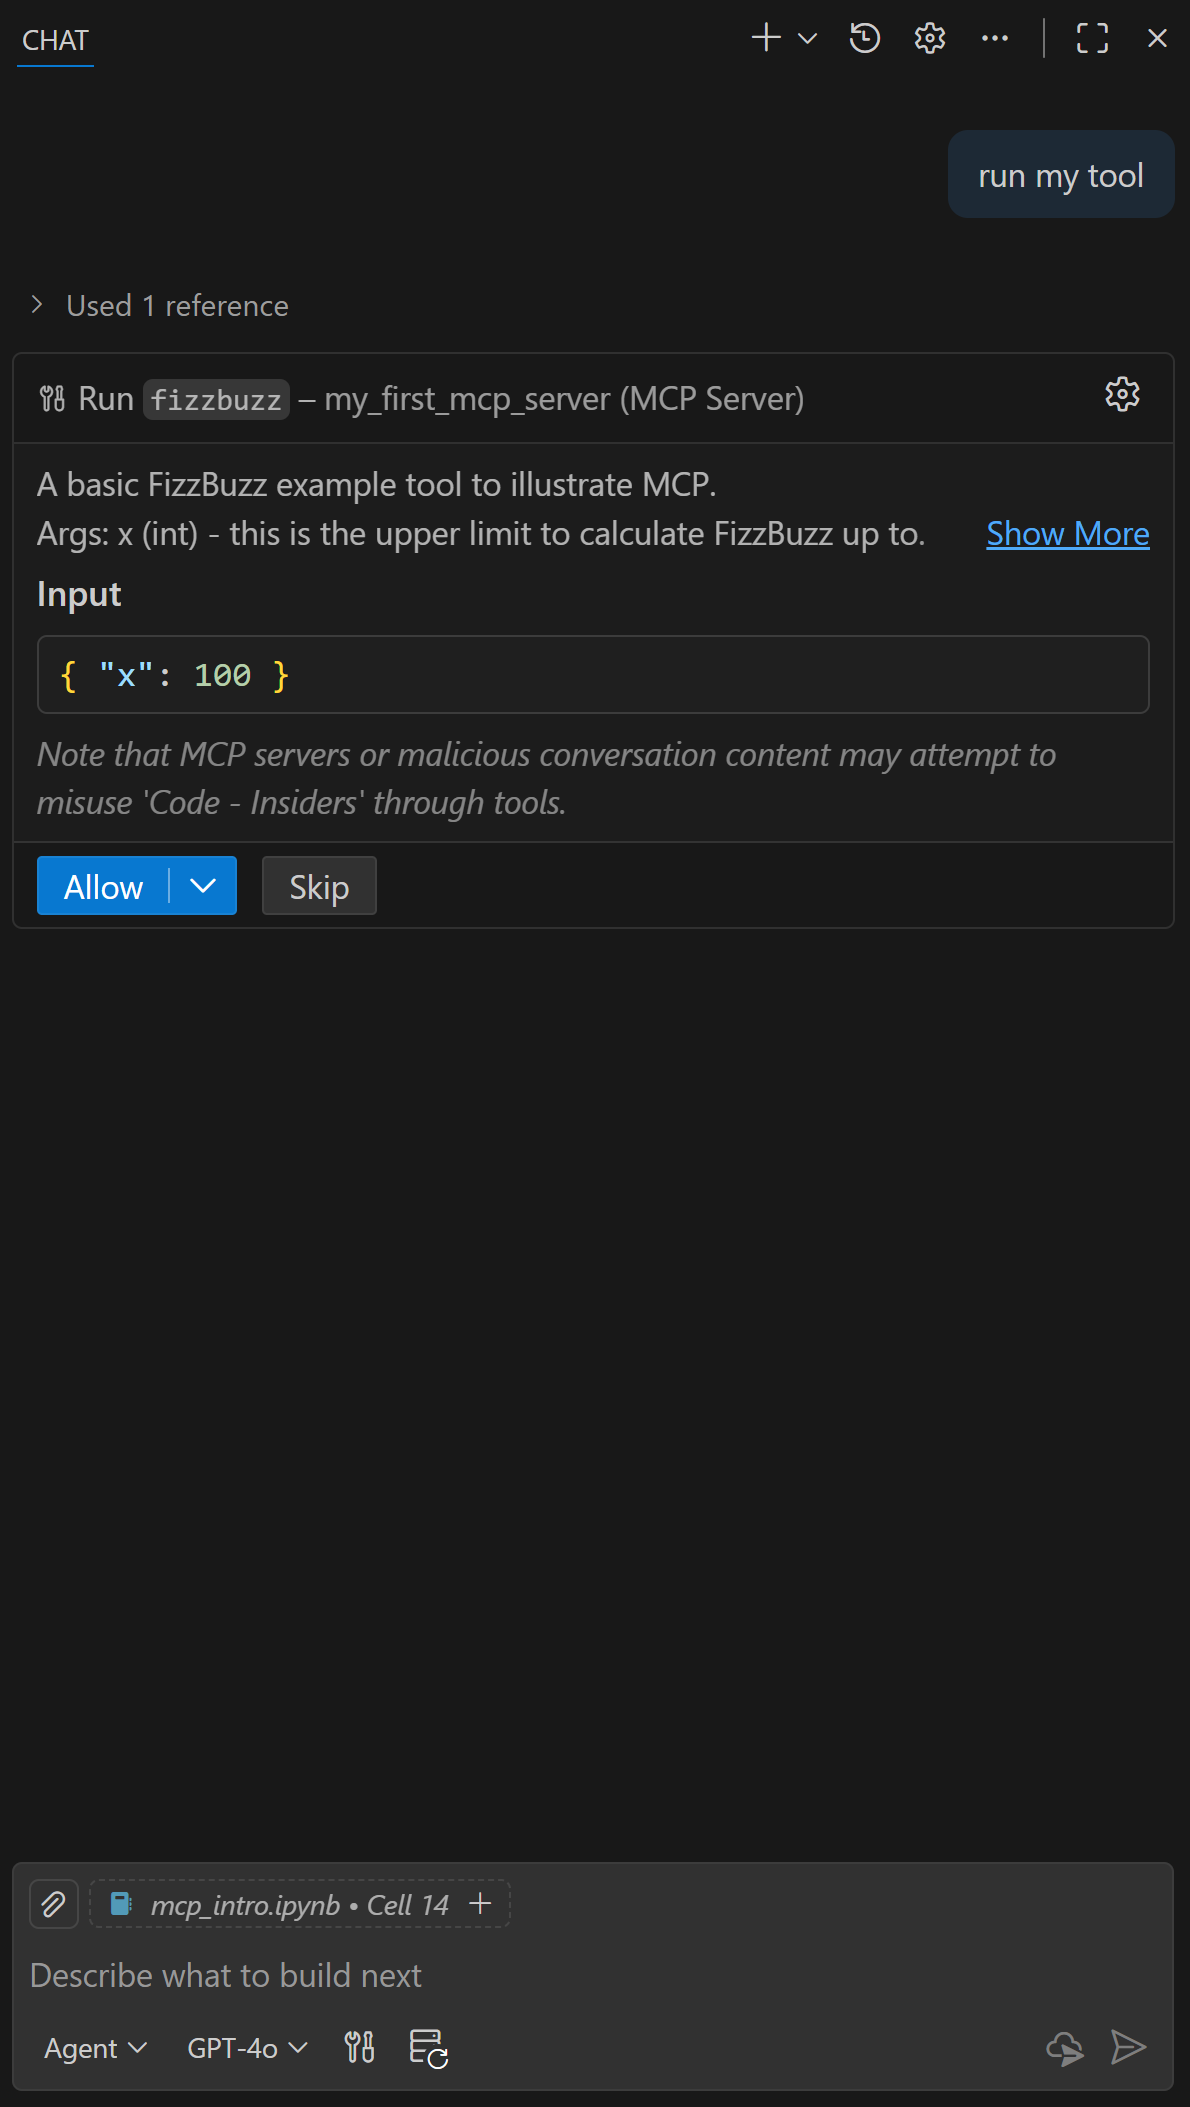

Then, I'll click to allow it to run. This provides some control and human in the loop, so you can inspect what it is planning to do before execution. After it runs, you'll be able to see the direct output and the LLM summary.

![tool_run_output.png](assets\tool_run_output.png)

![tool_run_llm_summary.png](assets\tool_run_llm_summary.png)









---
## <span style="color:#ffffff;"><strong>Part 6:</strong></span> Summary

### Summary of what we've done:
- Developed a basic MCP server.
- Created MCP tools.
- Tested our MCP server using the Github copilot MCP client.

> Author: Matthew Sayer